In [81]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [82]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [83]:
train.shape

(13375, 18)

In [84]:
train.head()

,id,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,10717,5596,Darkwatch,PS2,2005.0,Shooter,Ubisoft,0.16,0.12,0.00,0.04,0.32,74.0,37.0,8.4,42.0,High Moon Studios,M
1,13346,12819,Ken to Mahou to Gakuen Mono. 3D,3DS,2011.0,Role-Playing,Acquire,0.00,0.00,0.06,0.00,0.06,NaN,NaN,NaN,NaN,NaN,NaN
2,1063,6098,FIFA 15,PC,2014.0,Sports,Electronic Arts,0.00,0.27,0.00,0.02,0.28,82.0,9.0,4.2,383.0,EA Sports,E
3,12660,4932,The Darkness II,X360,2012.0,Shooter,Take-Two Interactive,0.24,0.11,0.00,0.03,0.39,80.0,71.0,7.5,219.0,Digital Extremes,M
4,11264,14483,Suggoi! Arcana Heart 2,PS2,2009.0,Fighting,AQ Interactive,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13375 entries, 0 to 13374
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               13375 non-null  int64  
 1   index            13375 non-null  int64  
 2   Name             13373 non-null  object 
 3   Platform         13375 non-null  object 
 4   Year_of_Release  13150 non-null  float64
 5   Genre            13373 non-null  object 
 6   Publisher        13328 non-null  object 
 7   NA_Sales         13375 non-null  float64
 8   EU_Sales         13375 non-null  float64
 9   JP_Sales         13375 non-null  float64
 10  Other_Sales      13375 non-null  float64
 11  Global_Sales     13375 non-null  float64
 12  Critic_Score     6505 non-null   float64
 13  Critic_Count     6505 non-null   float64
 14  User_Score       8007 non-null   object 
 15  User_Count       6039 non-null   float64
 16  Developer        8067 non-null   object 
 17  Rating      

In [86]:
train.isnull().sum()

id                    0
index                 0
Name                  2
Platform              0
Year_of_Release     225
Genre                 2
Publisher            47
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       6870
Critic_Count       6870
User_Score         5368
User_Count         7336
Developer          5308
Rating             5431
dtype: int64

In [87]:
test.isnull().sum()

id                    0
Name                  0
Platform              0
Year_of_Release      44
Genre                 0
Publisher             7
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Critic_Score       1712
Critic_Count       1712
User_Score         1336
User_Count         1793
Developer          1315
Rating             1338
dtype: int64

In [88]:
train['Rating'].value_counts()

E       3185
T       2377
M       1226
E10+    1144
EC         6
RP         3
K-A        2
AO         1
Name: Rating, dtype: int64

In [89]:
train = train.dropna(subset=['Name'])
train = train.dropna(subset=['Genre'])

In [90]:
for column in train[['Year_of_Release', 'Publisher', 'Rating']]:
    mode = train[column].mode()[0]
    train[column] = train[column].fillna(mode)
    
for column in train[['Critic_Score', 'Critic_Count', 'User_Count']]:
    mean = train[column].mean()
    train[column] = train[column].fillna(mean)

In [103]:
for column in test[['Year_of_Release', 'Publisher', 'Rating']]:
    mode = test[column].mode()[0]
    test[column] = test[column].fillna(mode)
    
for column in test[['Critic_Score', 'Critic_Count', 'User_Count','User_Score']]:
    mean = test[column].mean()
    test[column] = test[column].fillna(mean)

KeyError: "['User_Score'] not in index"

In [92]:
train = train.drop(['Developer'], axis = 1)
test = test.drop(['Developer'], axis = 1)

train = train.drop(['User_Score'], axis=1)
test = test.drop(['User_Score'], axis=1)

train = train.drop(['Rating'], axis=1)
test = test.drop(['Rating'], axis=1)

In [93]:
cols = ['Platform', 'Genre', 'Publisher', 'Rating']
for col in cols:
    uniques = train[col].value_counts().keys()
    uniques_dict = {}
    ct = 0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1

    for k, v in uniques_dict.items():
        train.loc[train[col] == k, col] = v

In [94]:
cols = ['Platform', 'Genre', 'Publisher', 'Rating']
for col in cols:
    uniques = test[col].value_counts().keys()
    uniques_dict = {}
    ct = 0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1

    for k, v in uniques_dict.items():
        test.loc[test[col] == k, col] = v

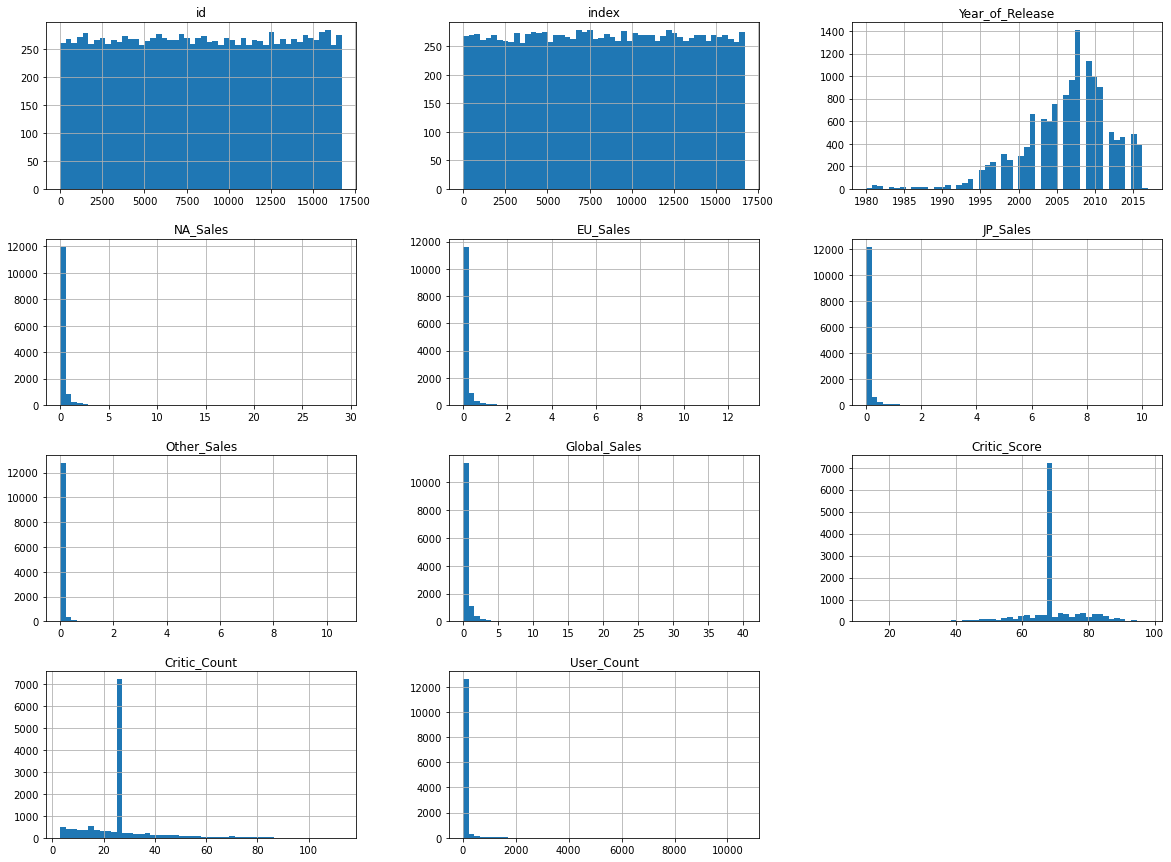

In [95]:
train.hist(bins=50,figsize=(20,15))
plt.show()

In [96]:
scaled_features = train.copy()

col_names = ['User_Count','Critic_Score','Critic_Count']
features = scaled_features[col_names]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features

In [97]:
scaled_features.head()

,id,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Rating
0,10717,5596,Darkwatch,0,2005.0,5,3,0.16,0.12,0.00,0.04,0.32,0.717647,0.309091,0.003564,2
1,13346,12819,Ken to Mahou to Gakuen Mono. 3D,11,2011.0,3,122,0.00,0.00,0.06,0.00,0.06,0.658178,0.211619,0.014853,0
2,1063,6098,FIFA 15,7,2014.0,1,0,0.00,0.27,0.00,0.02,0.28,0.811765,0.054545,0.035550,0
3,12660,4932,The Darkness II,4,2012.0,5,9,0.24,0.11,0.00,0.03,0.39,0.788235,0.618182,0.020167,2
4,11264,14483,Suggoi! Arcana Heart 2,0,2009.0,9,205,0.00,0.00,0.03,0.00,0.03,0.658178,0.211619,0.014853,0


In [98]:
y = scaled_features['Global_Sales']
X= scaled_features.drop(['Global_Sales','Name','id','index'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [99]:
# Building and fitting the Linear Regression model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

# Evaluating the Linear Regression model
print(linearModel.score(X_test, y_test))

0.9999907107808795


In [100]:
ridgeModelChosen = Ridge(alpha = 1)
ridgeModelChosen.fit(X_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.9999902405482543


In [101]:
y_pred = ridgeModelChosen.predict(X_test)

In [102]:
mean_absolute_error(y_test, y_pred)

0.003102080130549331

In [80]:
a = test.drop(['Name','id'], axis = 1)
sub_pred = ridgeModelChosen.predict(a)

ValueError: could not convert string to float: 'PS'

In [ ]:
submission = pd.DataFrame(columns=['id','Global_Sales'])
submission['id'] = test['id']
submission['Global_Sales'] = sub_pred

In [ ]:
submission

In [ ]:
submission.to_csv(r'C:\Users\DELL\Documents\College\Semester V\Machine Learning\Kaggle\submission1.csv',index = False, header=True)